<img src="images/backdrop.png">
 
 
### Dates/Deadlines

Code: <i>05/05/2019 (one week before submission)</i><br />
Report: <i>12/05/2019 (12:00 - noon)</i><br />


### Tasks that need doing
 * Plot map of Manhatten 
 * Create accuracy checker thing
 * Calculate distance between pick up and drop of (haversine)
 * Create method to plot actual vs predicted
 * Determine if holidays and weekends affect the trip duration
 * Perform PCA on dataset
 * Train model using XGBoost
 * Train Model using ... (Caitlin)
 * Train Model using Ada Boost (Tze-yi)
 * Train Model using KNN (Runyu)
 * Train Model using random forest or neural network (Leyan)
 * Compare results of all regression methods
 
 
### Code consistency - Important

When programming your respective models, can you call your training method <b>train()</b> and testing method <b>test()</b>. That way we'll be able to call them from a single combining method (Frankenstein's Monster Regression Model). If you would rather call them something else, just let me know and we can disucss.

Also it would be great if you can add code to your model that allows you to save and load it.
 
### Report

<p>We need to submit seperate reports, so everyone needs to have enough to do and everyone needs enough time to write about what it is we have done</p>

 * "Each team member submits their own independent write up. They also submit all of the code for the entire team. You may want to use the universities github service"
 * "The report has a 3000 word limit and must be a pdf file"
 
### Mark Scheme

The key aim here is to go beyond ‘off-the-shelf’, that is, you need to implement a solution
that is justifiably customised to the problem to get full marks. This doesn’t necessarily mean
the machine learning algorithms are unique, but that the approach as a whole is. This can
include feature design, combining multiple algorithms (system or ensemble), using further
data, sneaky tricks etc. You get marks for being smart, not for being complicated.
This project is worth 30% of your marks for the unit: <br />

 *  <b>5 marks</b>: Clearly explaining the problem and identifying ways to go beyond a problem-agnostic machine learning approach.
 * <b>5 marks</b>: Clearly explaining the solution(s) of your team as a whole, including identifying which details of the problem it exploits and how.
 * <b>10 marks</b>: A technical write up of the module(s) you contributed to your team. What they contribute, how they work, technical details. If they have a model give it; summarise any optimisation that occurs.
 * <b>10 marks</b>: Iterative evidence driven improvement, e.g. using the results of experiments to identify weaknesses with the current solution, proposing and implementing fixes, and then verifying via further experiments. While you write this section yourself it may discuss everything done within the team.
 
for a total of <b>30 marks</b>

 
### Links

[Data](https://www.kaggle.com/c/nyc-taxi-trip-duration/data)<br />
[GitHub](https://github.com/Xethagona/Taxi-Coursework)<br />
[Spreadsheet](https://docs.google.com/spreadsheets/d/1oDq2rzWd1lVhdg2UYh2J4zRbN8XWPYKDrr4scczLoog/edit?usp=sharing)


### Comments

 * I'd recommend labelling and titling your graphs
 * A few more comments in the code would be nice, not sure where some numbers have come from

In [1]:
#Importing
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import math
import xgboost as xgb

from sklearn.model_selection import train_test_split

%matplotlib inline

### Reading data from ZIP and converting to Pandas - Layan & Connor

Keeping the training and testing dataset as zip files reduces the file size 

In [4]:
#Creating zipFile instances 
training_zip = zipfile.ZipFile('train.zip') 
testing_zip = zipfile.ZipFile('test.zip') 
weather_zip = zipfile.ZipFile('2016-weather.zip')
weather_hourly_zip = zipfile.ZipFile('2016-hourlyWeather.zip')
fastest_route_test_zip = zipfile.ZipFile('fastest_routes_test.zip')
fastest_route_train_1_zip = zipfile.ZipFile('fastest_routes_train_part_1.zip')
fastest_route_train_2_zip = zipfile.ZipFile('fastest_routes_train_part_2_new.zip')
fastest_route_train_3_zip = zipfile.ZipFile('fastest_routes_train_part_3_new.zip')
stormWarning_zip = zipfile.ZipFile('NY_Storm_Events_2016.zip')

#Reading CSV file from zipFile instance 
train = pd.read_csv(training_zip.open('train.csv'))
test = pd.read_csv(testing_zip.open('test.csv'))
weather = pd.read_csv(weather_zip.open('weather_data_nyc_centralpark_2016(1).csv'))
weather_hourly = pd.read_csv(weather_hourly_zip.open('Weather.csv'))
fastest_route_test = pd.read_csv(fastest_route_test_zip.open('fastest_routes_test.csv'))
fastest_route_train_1 = pd.read_csv(fastest_route_train_1_zip.open('fastest_routes_train_part_1.csv'))
fastest_route_train_2 = pd.read_csv(fastest_route_train_2_zip.open('fastest_routes_train_part_2_new.csv'))
fastest_route_train_3 = pd.read_csv(fastest_route_train_3_zip.open('fastest_routes_train_part_3_new.csv'))
stormWarning = pd.read_csv(stormWarning_zip.open('NY_Storm_Events_2016.csv'))

### Data visualising - Leyan

In [5]:
train = train.dropna()
### remove the text 'id' in the id column
train['id'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
train.sort_values(by='id').reset_index(drop=True)
print("Done") #Removes the large output

Done


In [ ]:
### visualisation

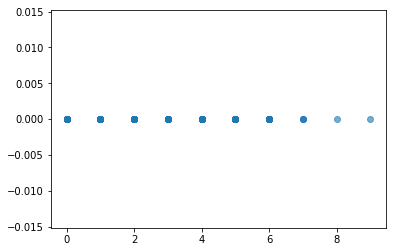

In [4]:
x1=train['passenger_count'].values
y1=np.zeros(1458644)
plt.scatter(x1,y1,alpha=0.6)
plt.show() 

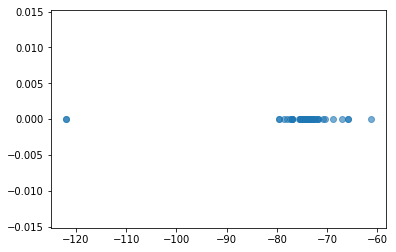

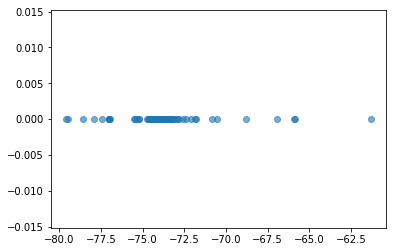

In [5]:
x2=train['pickup_longitude'].values
y2=np.zeros(1458644)
plt.scatter(x2,y2,alpha=0.6)
plt.show()

index_drop = train.index[train['pickup_longitude'] < -120].tolist()
train = train.drop(index_drop)

train[train['pickup_longitude'] < -120]

x2=train['pickup_longitude'].values
y2=np.zeros(1458642)
plt.scatter(x2,y2,alpha=0.6)
plt.show()                 

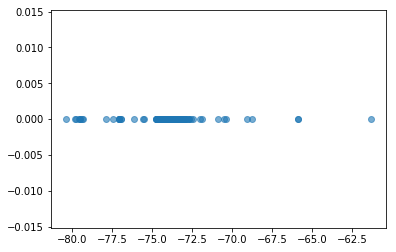

In [6]:
x3=train['dropoff_longitude']. values
y3=np.zeros(1458642)
plt.scatter(x3,y3,alpha=0.6)
plt.show()



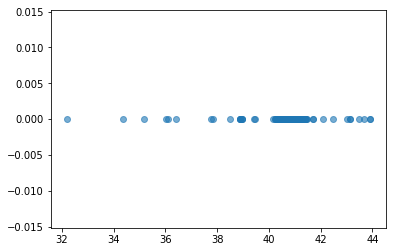

In [7]:
x4=train['dropoff_latitude'].values
y4=np.zeros(1458642)
plt.scatter(x4,y4,alpha=0.6)
plt.show()



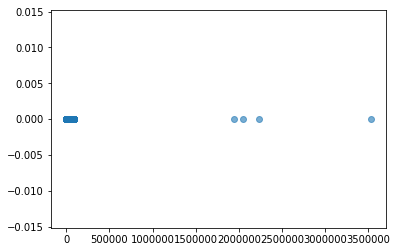

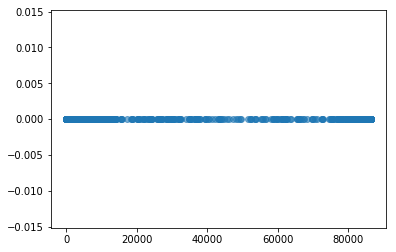

In [8]:
x5=train['trip_duration'].values
y5=np.zeros(1458642)
plt.scatter(x5,y5,alpha=0.6)
plt.show()


index_drop = train.index[train['trip_duration'] >1500000].tolist()
train = train.drop(index_drop)
#display(train)


x5=train['trip_duration'].values
y5=np.zeros(1458638)
plt.scatter(x5,y5,alpha=0.6)
plt.show()

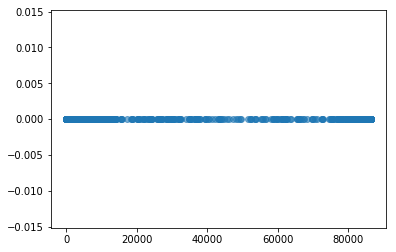

In [9]:
x5=train['trip_duration'].values
y5=np.zeros(1458638)
plt.scatter(x5,y5,alpha=0.6)
plt.show()

<hr style="height: 1.0px;"/>

### Data Preprocessing - Connor

Investigating averages from the data

Data: 19/04/2019

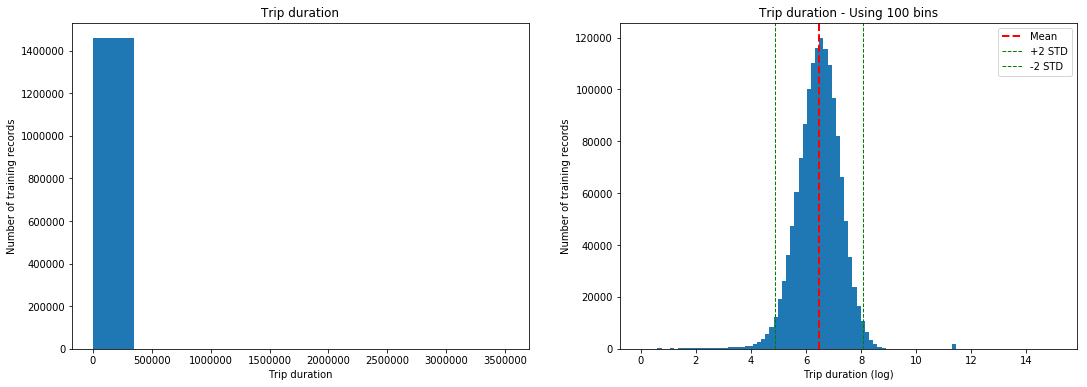

In [6]:
#Average length of a trip (Add log)
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.hist(train['trip_duration'])
plt.title("Trip duration")
plt.xlabel("Trip duration")
plt.ylabel("Number of training records")
plt.subplot(1, 2, 2)
plt.hist(np.log(train['trip_duration']), bins=100)
plt.axvline(np.log(train['trip_duration']).mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(np.log(train['trip_duration']).mean() + 2*np.log(train['trip_duration']).std(), color='green', linestyle='dashed', linewidth=1, label="+2 STD")
plt.axvline(np.log(train['trip_duration']).mean() + -2*np.log(train['trip_duration']).std(), color='green', linestyle='dashed', linewidth=1, label="-2 STD")
plt.title("Trip duration - Using 100 bins")
plt.xlabel("Trip duration (log)")
plt.ylabel("Number of training records")
plt.legend()
plt.show()

Trips duration longer than:
	1.5 Hours: 3097 | 0.212%
	2.0 Hours: 2253 | 0.154%
	3.0 Hours: 2112 | 0.145%

Trips duration shorter than:
	30 Seconds: 4890 | 0.335%
	60 Seconds: 8777 | 0.602%


Removing: 7987 rows


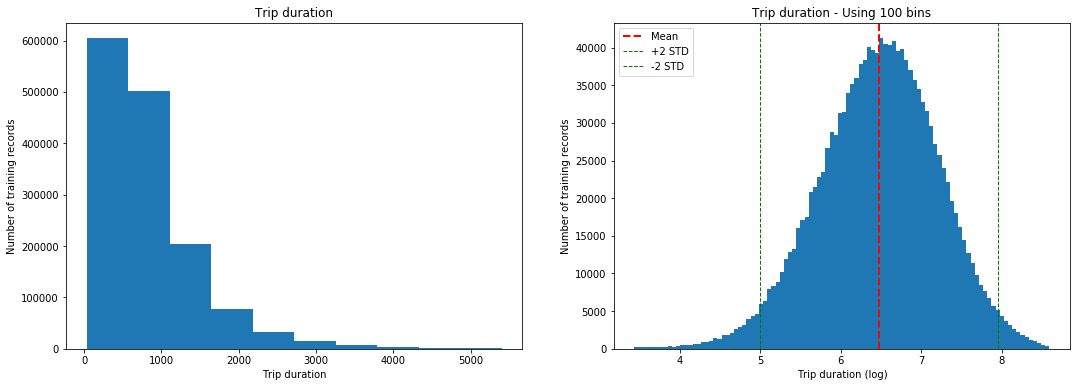

In [7]:
#Removing trips longer than or short than specfic values
longThan  = (60*60)* 2 #2 hours
longThan2 = (60*60)* 3 #3 hours
longThan3 = (60*60)* 1.5 #1.5 hours
shortThan = 30 #30 seconds
shortThan2 = 60 #1 minute

temp = train

print("Trips duration longer than:")
print('\t1.5 Hours: %d | %0.3f%%' % (sum(temp['trip_duration'] > longThan3), (sum(temp['trip_duration'] > longThan3)/len(temp))*100))
print('\t2.0 Hours: %d | %0.3f%%' % (sum(temp['trip_duration'] > longThan), (sum(temp['trip_duration'] > longThan)/len(temp))*100))
print('\t3.0 Hours: %d | %0.3f%%' % (sum(temp['trip_duration'] > longThan2), (sum(temp['trip_duration'] > longThan2)/len(temp))*100))
print("")

print("Trips duration shorter than:")
print('\t30 Seconds: %d | %0.3f%%' % (sum(temp['trip_duration'] <= shortThan), (sum(temp['trip_duration'] <= shortThan)/len(temp))*100))
print('\t60 Seconds: %d | %0.3f%%' % (sum(temp['trip_duration'] <= shortThan2), (sum(temp['trip_duration'] <= shortThan2)/len(temp))*100))
print("\n")

print("Removing:", sum(temp['trip_duration'] <= shortThan) + sum(temp['trip_duration'] > longThan3), "rows")
temp = temp.drop(temp[temp.trip_duration > longThan3].index)
temp = temp.drop(temp[temp.trip_duration <= shortThan].index)


plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.hist(temp['trip_duration'])
plt.title("Trip duration")
plt.xlabel("Trip duration")
plt.ylabel("Number of training records")
plt.subplot(1, 2, 2)
plt.hist(np.log(temp['trip_duration']), bins=100)
plt.axvline(np.log(temp['trip_duration']).mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(np.log(temp['trip_duration']).mean() + 2*np.log(temp['trip_duration']).std(), color='green', linestyle='dashed', linewidth=1, label="+2 STD")
plt.axvline(np.log(temp['trip_duration']).mean() + -2*np.log(temp['trip_duration']).std(), color='green', linestyle='dashed', linewidth=1, label="-2 STD")
plt.title("Trip duration - Using 100 bins")
plt.xlabel("Trip duration (log)")
plt.ylabel("Number of training records")
plt.legend()
plt.show()

In [8]:
#Checking for duplicate fields and for impossible results
print("Duplicate fields (Train): ", train.duplicated().sum())
print("Duplicate fields (Test): ", train.duplicated().sum())
print("Duplicate ID fields (Train): ",train.id.duplicated().sum())
print("Duplicate ID fields: (Test)",test.id.duplicated().sum())
print("Number of error fields: ", sum(train.dropoff_datetime < train.pickup_datetime))

Duplicate fields (Train):  0
Duplicate fields (Test):  0
Duplicate ID fields (Train):  0
Duplicate ID fields: (Test) 0
Number of error fields:  0


<hr style="height: 1.0px;"/>

### Comparing the 'Vendor' vs 'Trip Duration' - SOMEBODY

It might be of interest to see the average trip duration for each vendor. Maybe plot two histographs over one another?

In [ ]:
#CODE

<hr style="height: 1.0px;"/>

### Data Cleaning and Feature Reduction - Connor

Date: 19/04/2019

In [9]:
#Data Cleaning and feature reduction
print("Train Shape: ", train.head(5).shape)
print("Test Shape: ", test.head(5).shape)
print("\n") #Carriage return

#For some reason the test data contains two less columns
print("Missing Columns: ", set(list(train)) - set(list(test)))

#Can't remove trip_duration as it is needed in training process but no
# need to keep 'dropoff_datatime'
print("Dropping 'dropoff_datetime'")
train = train.drop('dropoff_datetime',1)

Train Shape:  (5, 11)
Test Shape:  (5, 9)


Missing Columns:  {'trip_duration', 'dropoff_datetime'}
Dropping 'dropoff_datetime'


<hr style="height: 1.0px;"/>

### Normalise time data - Connor

Removing the column 'pickup_datetime' and replacing it with four new columns:
  * pickup_year
  * pickup_month
  * pickup_hour
  * pickup_minute
  * pickup_second

It might also be of interest to see what impact the time of pickup has on the duration of the trip or weather or not it is during work hours. As a result, several new columns have been added:

 * workTime - referring to whether or not the pickup was between 9am and 5pm 
 * lateNight - referring to whether or not the pickup was between 10pm and 6am
 * weekday - referring to whether or not the pickup was during a weekday (Monday - Friday)

#### Things need doing
 * Determine if some trips are taking forever
 * Determine if its a holiday 

Date: 19/04/2019

In [10]:
#Normalise time data

#Current 'pickup_datetime' format: 2016-03-14 17:24:55 OR YYYY-MM-DD HH:MM:SS
train[['Date','Time']] = train.pickup_datetime.str.split(" ",expand=True,)
train[['pickup_Year','pickup_Month','pickup_Day']] = train.Date.str.split("-",expand=True,)
train[['pickup_Hour','pickup_Minute','pickup_Second']] = train.Time.str.split(":",expand=True,)

#Dropping columns
train = train.drop('pickup_datetime',1)
train = train.drop('Date',1)
train = train.drop('Time',1)
train = train.drop('pickup_Second',1)

In [11]:
#Determining if working hours 
startWork = "09" #9am
endWork = "17" #5pm

startLateNight = "22" #10pm
endLateNight = "06" #6am
    
def workTime(row):
    if((row['pickup_Hour'] >= startWork) and (row['pickup_Hour'] <= endWork)):
        return True
    else:
        return False
    
def lateNight(row):
    if((row['pickup_Hour'] >= startLateNight) or (row['pickup_Hour'] <= endLateNight)):
        return True
    else:
        return False
    
def weekday(row):
    df = pd.Timestamp(row['pickup_Year'] + "-" + row['pickup_Month'] + "-" + row['pickup_Day'])
    
    if df.dayofweek<5:
        return True
    else:
        return False

#Determing if during workTime, lateNight and weekday
train['workTime'] = train.apply (lambda x: workTime(x), axis=1)
train['lateNight'] = train.apply (lambda x: lateNight(x), axis=1)
train['weekday'] = train.apply (lambda x: weekday(x), axis=1)

<hr style="height: 1.0px;"/>

### Determing if holiday or not - Caitlin

* words *

In [12]:
# CODE

<hr style="height: 1.0px;"/>

### Calculate the distance travelled - Connor

It might be of interest to determine how far the taxi has travelled (could help spot potential outliers)<br />
Using the equation below: <br /><br />

<center>
       <img src="images/distanceEquation2.png"><br />
       Source: <a href="https://andrew.hedges.name/experiments/haversine/">Finding distances based on Latitude and Longitude</a>
</center>

The distance between the starting location and final location will be calculated. Obviously this distance will be an approximation as it is impossible to determine the route taken. This distance will be "as the crow flies".

<br />

The distance travelled has very long tails, as a result, the distances over and under specific values could dropped?



/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


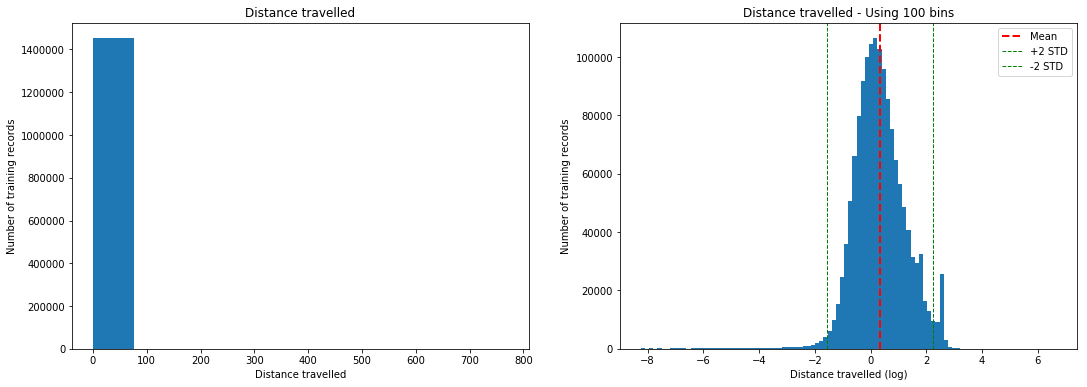

In [18]:
#Approximate radius of earth
R = 3961 #Miles
#R = 6373 #Km


def distance(row):
    lat1 = math.radians(row['pickup_latitude'])
    lon1 = math.radians(row['pickup_longitude'])
    
    lat2 = math.radians(row['dropoff_latitude'])
    lon2 = math.radians(row['dropoff_longitude'])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    temp = (R * c)
    if(temp <= 0):
        #No movement
        return np.nan
    return temp
    
train['distanceTravelled'] = train.apply (lambda x: distance(x), axis=1)

#Some of the fields had no movement and as a result are dropped
train.dropna()

#Plotting the distance travelled on a histograph for observation purposes 
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.hist(train['distanceTravelled'])
plt.title("Distance travelled")
plt.xlabel("Distance travelled")
plt.ylabel("Number of training records")
plt.subplot(1, 2, 2)
plt.hist(np.log(train['distanceTravelled']), bins=100)
plt.axvline(np.log(train['distanceTravelled']).mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(np.log(train['distanceTravelled']).mean() + 2*np.log(train['distanceTravelled']).std(), color='green', linestyle='dashed', linewidth=1, label="+2 STD")
plt.axvline(np.log(train['distanceTravelled']).mean() + -2*np.log(train['distanceTravelled']).std(), color='green', linestyle='dashed', linewidth=1, label="-2 STD")
plt.title("Distance travelled - Using 100 bins")
plt.xlabel("Distance travelled (log)")
plt.ylabel("Number of training records")
plt.legend()
plt.show()

Trips travelled further than:
	20 miles: 442 | 0.030%
	100 miles: 13 | 0.001%

Trips travelled less than:
	0.10 miles: 9473 | 0.649%
	0.01 miles: 3379 | 0.232%


Removing: 9915 rows


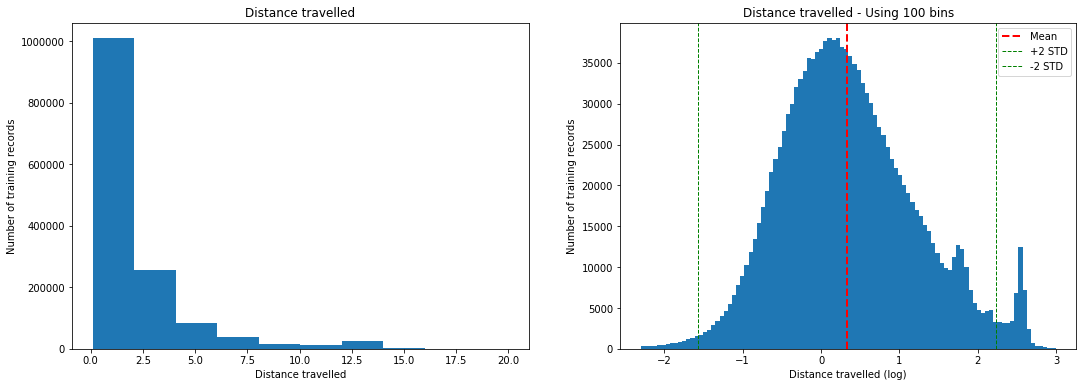

In [19]:

temp = train

print("Trips travelled further than:")
print('\t20 miles: %d | %0.3f%%' % (sum(temp['distanceTravelled'] > 20), (sum(temp['distanceTravelled'] > 20)/len(temp))*100))
print('\t100 miles: %d | %0.3f%%' % (sum(temp['distanceTravelled'] > 100), (sum(temp['distanceTravelled'] > 100)/len(temp))*100))
print("")

print("Trips travelled less than:")
print('\t0.10 miles: %d | %0.3f%%' % (sum(temp['distanceTravelled'] <= 0.1), (sum(temp['distanceTravelled'] <= 0.1)/len(temp))*100))
print('\t0.01 miles: %d | %0.3f%%' % (sum(temp['distanceTravelled'] <= 0.01), (sum(temp['distanceTravelled'] <= 0.01)/len(temp))*100))
print("\n")

print("Removing:", sum(temp['distanceTravelled'] > 20) + sum(temp['distanceTravelled'] <= 0.1), "rows")
temp = temp.drop(temp[temp.distanceTravelled > 20].index)
temp = temp.drop(temp[temp.distanceTravelled <= 0.1].index)



#Plotting the distance travelled on a histograph for observation purposes 
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.hist(temp['distanceTravelled'])
plt.title("Distance travelled")
plt.xlabel("Distance travelled")
plt.ylabel("Number of training records")
plt.subplot(1, 2, 2)
plt.hist(np.log(temp['distanceTravelled']), bins=100)
plt.axvline(np.log(train['distanceTravelled']).mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(np.log(train['distanceTravelled']).mean() + 2*np.log(train['distanceTravelled']).std(), color='green', linestyle='dashed', linewidth=1, label="+2 STD")
plt.axvline(np.log(train['distanceTravelled']).mean() + -2*np.log(train['distanceTravelled']).std(), color='green', linestyle='dashed', linewidth=1, label="-2 STD")
plt.title("Distance travelled - Using 100 bins")
plt.xlabel("Distance travelled (log)")
plt.ylabel("Number of training records")
plt.legend()
plt.show()


<hr style="height: 1.0px;"/>

### Map of Manhatten - Runyu

* add words *

In [ ]:
#CODE

plt.figure(figsize=(20,10))

train_coord = train.loc[(train.pickup_latitude > 40.6) & (train.pickup_latitude < 40.9)]
train_coord = train_coord.loc[(train.dropoff_latitude > 40.6) & (train.dropoff_latitude < 40.9)]
train_coord = train_coord.loc[(train.pickup_longitude > -74.05) & (train.pickup_longitude < -73.7)]
train_coord = train_coord.loc[(train.dropoff_longitude > -74.05) & (train.dropoff_longitude < -73.7)]

# Combining Pickup and Dropoff values into a list for Latitudes and Longitudes 
longitudes = list(train_coord.pickup_longitude) + list(train_coord.dropoff_longitude)
latitudes = list(train_coord.pickup_latitude) + list(train_coord.dropoff_latitude)

# Plot the latitude and Longitude values
plt.plot(longitudes, latitudes, '.', alpha=0.6, markersize=0.05, color='purple')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('City Map of NYC Trips using Latitudes and Longitudes')
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharey=True, figsize=(20,30))

train_coord.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude', color='green', s=0.02, alpha=0.6, subplots=True, ax=ax1)
train_coord.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude', color='blue', s=0.02, alpha=0.6, subplots=True, ax=ax2)
ax1.set_title('Taxi Trip Pickups (Long,Lat)')
ax2.set_title('Taxi Trip Dropoffs (Long,Lat)')
from IPython.display import Image

# Load and Display Image of NYC on map
Image('./nyc_img.png')

<hr style="height: 1.0px;"/>

### Accuracy Checker - Connor

In order to determine how accurate the model is, the user will have to compare the the predicted results against the actual results. There are two approaches that can be taken, an exact comparison where only a '1' will be returned if the predicted durations is exactly the same, or an approximate duration where a percentage-out is allowed

In [31]:
def accuracy(actual, predicted, percentage=0):
    #The two lists need to be of the same size
    if(len(actual) != len(predicted)):
        return np.nan
    
    if(percentage == 0):
        temp = actual == predicted
    else:
        temp = ((actual * percentage) <= predicted) & (predicted <= ((1 + percentage) * actual))
    
    return (sum(temp)/len(actual)*100)    

<hr style="height: 1.0px;"/>

### Plot actual vs Predicted - Tze-yi

* add words *

In [ ]:
#CODE

<hr style="height: 1.0px;"/>

### Principal component analysis (PCA) - Tze-yi

* add words *

Not entirely sure what this will show, but give it ago - Connor

In [ ]:
#CODE

<hr style="height: 1.0px;"/>

### Training/Testing split - Tze-yi

* add words *

In [20]:
# train split to 75/25

split = len(train) * 0.75

train_train = train.loc[:split,:]
train_test = train.loc[split:,:]

print('Taining total set size:',train.shape[0])
print('Training set size:', train_train.shape[0])
print('Test set size:', train_test.shape[0])

X_train, X_test = train_test_split(train, test_size=0.25)

print('Taining total set size:',train.shape[0])
print('Training set size:', X_train.shape[0])
print('Test set size:', X_test.shape[0])

Taining total set size: 1458644
Training set size: 1093984
Test set size: 364661
Taining total set size: 1458644
Training set size: 1093983
Test set size: 364661


<br />
<hr style="height: 1.0px;"/>

# Machine Learning

Using a variety of different Machine Learning techniques and data sources, a comparative analysis into the effectiveness and reliability of the methods will be conducted. These methods include:
 * eXtreme Gradient Boosting (XGBoosting)
 * Ada Boost
 * Random Forest
 * Neural Networks
 * K-Nearest Neighbor (KNN)
 * CAITLIN
 
In order to gain better results, a wide range of external sources are also used. For example:
 * XGBoosting will be incorporated with:
  * 2016 weather forecast
  * 2016 hourly weather forecast (for comparative reaons)  
  * OSRM
  * Storm Warnings


Finally, after each Machine Learning process has been trained, the features of the most importance will be determined. This will help identify the significant features for a given model.


<hr style="height: 1.0px;"/>

### XGBoost with variational datasources - Connor

In order to determine which dataset has the largest effect on the accuracy of the model, $5$ models will be created. After each model has been trained for $n$ iterations, the accuracy will be calculated from the testing dataset (25% of the training dataset). The base model will include just the given training data and no external data sources, this will give a good bench mark to work on. All other models will include one or more external sources.


Models:
 * Default (given data)
 * 2016 daily weather
 * 2016 hourly weather
 * OSRM
 * Storm Warning
 
Should time permit it, a combination of the above models will be used.

<b>Why XGBoost?</b><br />
words...

<b>Parameters:</b><br />
XGBoost has lots of hyper-parameters that can be fine tuned. As such, finding the optimum combination can take days of running. As a result, minimal parameter tuning will be used. For a guide on parameter tuning with XGBoost, look at [analyticsvidhya](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/).

NOTES:

* Storm Warning:
 * This info can reduce the RMSLE in my experiments, you can refer the sample code to add the info into datasets: https://www.kaggle.com/c/nyc-taxi-trip-duration/discussion/38591#216546
* Can we train using the lon and lat? Thinking about assigning areas rather than two seemingly random numbers?
* 'store_and_fwd_flag' caused some problems, not sure if even needed

In [67]:
#Testing, drop where 'trip_duration' is zero
train = train[train.trip_duration != 0]

#Could consider taking the log?
y = np.log(train['trip_duration'])

#Some of the data cannot be used for training, for example, the trip duration as thats the output
Not_train_cols = ['id','trip_duration', 'distanceTravelled', 'dropoff_longitude', \
                      'dropoff_latitude', 'store_and_fwd_flag']

dropped_train = train.drop([col for col in Not_train_cols if col in train], axis=1)
feature_names = list(dropped_train.columns)

x_train, x_test, y_train, y_test = train_test_split(dropped_train[feature_names], y, \
                                                    test_size=0.25)

#Creating the XGBoot matrices
xgb_train = xgb.DMatrix(x_train.values, label=y_train.values)

xgb_valid = xgb.DMatrix(x_test.values, label=y_test.values)
watchlist = [(xgb_train, 'train'), (xgb_valid, 'valid')]

0


In [68]:
#Testing

#Borrow code
from sklearn.model_selection import GridSearchCV

def rmsle(evaluator,X,real):
    sum = 0.0
    predicted = evaluator.predict(X)
    print("Number predicted less than 0: {}".format(np.where(predicted < 0)[0].shape))

    predicted[predicted < 0] = 0
    for x in range(len(predicted)):
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p-r)**2
    return (sum/len(predicted))**0.5


cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.08, 'n_estimators': 100, 'seed':0, 'subsample': 0.75, 'colsample_bytree': 1}
optimized_GBM = GridSearchCV(xgb.XGBRegressor(**ind_params), 
                            cv_params,scoring = rmsle, cv =4) 
optimized_GBM.fit(x_train.values, np.ravel(y_train))

Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted less than 0: (0,)
Number predicted les

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.08, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.75),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=<function rmsle at 0x1be57a6a8>, verbose=0)

In [69]:
prediction = optimized_GBM.predict(x_train.values)

print(accuracy(y_train, prediction, 0.2))

for x in range(100):
    print(y_train.iloc[x], " | ", prediction[x])

93.30071856692471
6.913737350659685  |  6.3580556
6.498282149476434  |  6.5381484
6.829793737512425  |  6.458058
6.566672429803241  |  7.5177536
6.385194398997726  |  6.529667
6.890609120147166  |  6.4093184
5.564520407322694  |  6.496885
6.135564891081739  |  6.4268475
6.940222469119639  |  6.477753
6.298949246855942  |  6.2879524
6.447305862541213  |  6.379732
5.529429087511423  |  6.4702067
5.087596335232384  |  6.3102527
7.979338895262328  |  7.618603
6.787844982309579  |  6.4054117
7.787382026484701  |  6.44626
5.517452896464707  |  6.261937
7.421775793644647  |  6.4712014
5.840641657373398  |  6.4466743
6.418364935936212  |  6.3668427
5.4116460518550396  |  6.449968
6.470799503782602  |  6.369569
7.418180822726788  |  7.5933
6.22455842927536  |  6.278125
6.340359303727752  |  6.3818927
4.919980925828125  |  6.5404186
6.894670039433482  |  6.3453918
4.605170185988092  |  6.26239
6.773080375655535  |  6.4842787
6.507277712385012  |  6.501989
7.074116816197362  |  6.46395
7.09340462

In [57]:
#dtrain = xgb.DMatrix(train_x, label=train_y)
#dvalid = xgb.DMatrix(val_x, label=val_y)
#dtest = xgb.DMatrix(new_df_test.values)
#watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

xgb_params = {'colsample_bytee': 0.7, 'subsample':0.7, 'booster': 'gbtree', 'max_depth': 5, 'eval_metric': 'rmse', \
              'objective': 'reg:linear', 'seed': 4321}

xgb_pars = {'min_child_weight': 100, 'eta': 0.1, 'colsample_bytree': 0.7, 'max_depth': 15,
            'subsample': 0.8, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}

model_xgb = xgb.train(xgb_params, xgb_train, 500, watchlist, early_stopping_rounds=50,
                  maximize=False, verbose_eval=5)


[0]	train-rmse:4.24671	valid-rmse:4.24719
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[5]	train-rmse:1.02685	valid-rmse:1.02838
[10]	train-rmse:0.7546	valid-rmse:0.756951
[15]	train-rmse:0.743773	valid-rmse:0.746415
[20]	train-rmse:0.74204	valid-rmse:0.744916
[25]	train-rmse:0.740316	valid-rmse:0.743408
[30]	train-rmse:0.739153	valid-rmse:0.742521
[35]	train-rmse:0.738171	valid-rmse:0.74175
[40]	train-rmse:0.737699	valid-rmse:0.741441
[45]	train-rmse:0.737078	valid-rmse:0.741068
[50]	train-rmse:0.73666	valid-rmse:0.740914
[55]	train-rmse:0.736216	valid-rmse:0.74063
[60]	train-rmse:0.735834	valid-rmse:0.740391
[65]	train-rmse:0.734936	valid-rmse:0.739722
[70]	train-rmse:0.734517	valid-rmse:0.739501
[75]	train-rmse:0.734169	valid-rmse:0.739357
[80]	train-rmse:0.733902	valid-rmse:0.739261
[85]	train-rmse:0.733698	valid-rmse:0.73917
[90]	train-rmse:0.733401	valid-rmse:0.73908
[95]	train-rms

In [61]:
pred = model_xgb.predict(x_train)

print(accuracy(np.log(y_train), pred, 0.2))

for x in range(50):
    print(np.log(y_train.iloc[x]), " | ", pred[x])

AttributeError: 'numpy.ndarray' object has no attribute 'feature_names'

In [39]:
#Training the basic model 
#model_xgb = xgb.train('default', short_XGB_train)


xgb_val = xgb.DMatrix(x_test.values, label=y_test.values)
watchlist = [(xgb_train, 'train'), (xgb_val, 'valid')]


#Not using these are the mo
xgb_pars = {'min_child_weight': 100, 'eta': 0.1, 'colsample_bytree': 0.7, 'max_depth': 15,
            'subsample': 0.8, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}


print(xgb_train.num_col())
print(xgb_train.num_row())

#model_xgb = xgb.train('default', xgb_train, 500, watchlist, early_stopping_rounds=50,
#                  maximize=False, verbose_eval=20)

12
1093978


In [10]:
#Training the model with ...
#CODE

<hr style="height: 1.0px;"/>

### Ada Boost - Tze-yi

* words *

In [ ]:
#CODE

<hr style="height: 1.0px;"/>

### kNN - Runyu

* words *

In [13]:
#CODE

<hr style="height: 1.0px;"/>

### Random Forrest - Leyan

* words *

In [14]:
#CODE

<hr style="height: 1.0px;"/>

### Neural Network - Leyan

* words *

In [15]:
#CODE

<hr style="height: 1.0px;"/>

### ...  - Caitlin

* words *

In [16]:
#CODE

<hr style="height: 1.0px;"/>

### Frankenstein's Monster Regression Model - SOMEBODY

Can some one programme a method that takes $n$ models as input and takes 'x' data as input and calls the 'test' method from each model? 


In [17]:
#CODE